In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Font modification
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

In [3]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)


#results.drop(['RMSE opt-rmse', 'R2 opt-rmse'], axis=1, inplace=True)
#results.rename(columns={'RMSE opt-r2':'RMSE', 'R2 opt-r2':'R2'}, inplace=True)
results.sort_values('RMSE test', inplace=True)
results.T

,elnet,SVM
alpha,0.0251189,NA
l1_ratio,1,NA
pca__n_components,26,35
savgol__deriv,2,1
savgol__polyorder,3,3
savgol__wavemax,1478,1434
savgol__wavemin,1038,1062
savgol__window_length,13,13
RMSE train,4.37893,4.25048
R2 train,0.757085,0.771127


# scores

In [4]:
# Sorted by RMSE
results[['RMSE test', 'RMSE train', 'R2 test', 'R2 train']]

,RMSE test,RMSE train,R2 test,R2 train
elnet,4.678057,4.378928,0.700877,0.757085
SVM,4.731819,4.250480,0.693962,0.771127


In [5]:
# PCA
results[['pca__n_components']]

,pca__n_components
elnet,26.0
SVM,35.0


In [6]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
elnet,2.0,3.0,1478.0,1038.0,13.0
SVM,1.0,3.0,1434.0,1062.0,13.0


In [7]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
elnet,14.795918,33.673469,47.448980,58.163265,80.612245,92.346939,95.918367
SVM,15.816327,32.653061,46.938776,61.224490,85.204082,89.285714,94.897959


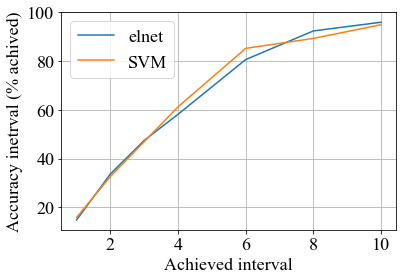

In [8]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Accuracy inetrval (% achived)')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png', bbox_inches = 'tight')
plt.show()

# Regularization

In [9]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
elnet,0.0251189,1,NA,NA
SVM,NA,NA,3.16228,1
